In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

In [2]:
g_df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
r_df = pd.read_csv('/data/HSC/HSC_v6/step1/r_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
i_df = pd.read_csv('/data/HSC/HSC_v6/step1/i_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
z_df = pd.read_csv('/data/HSC/HSC_v6/step1/z_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
y_df = pd.read_csv('/data/HSC/HSC_v6/step1/y_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')

In [3]:
metrics = ["bias", "outlier_rate", "loss", "rmse"]
metric_names = ['Bias', 'Outlier Rate', 'Loss', 'RMSE']
shape_params = ["SPHEROID_SERSICN", "ISOAREA_IMAGE", "FLUX_RADIUS", "MU_MAX", "ELLIPTICITY", "A_IMAGE", "B_IMAGE", "THETA_IMAGE", "PIXEL_AREA"]
shape_param_names = ['Sersic Index', 'Isophotal Area', 'Half-Light Radius', 'Max Surface Brightness', 'Ellipticity', 'Major Axis', 'Minor Axis', 'Position Angle', 'Pixel Area']

In [4]:
df_list = [g_df, r_df, i_df, z_df, y_df]

colors = ['green', 'red', 'blue', 'orange', 'purple']
bands = ['g', 'r', 'i', 'z', 'y']

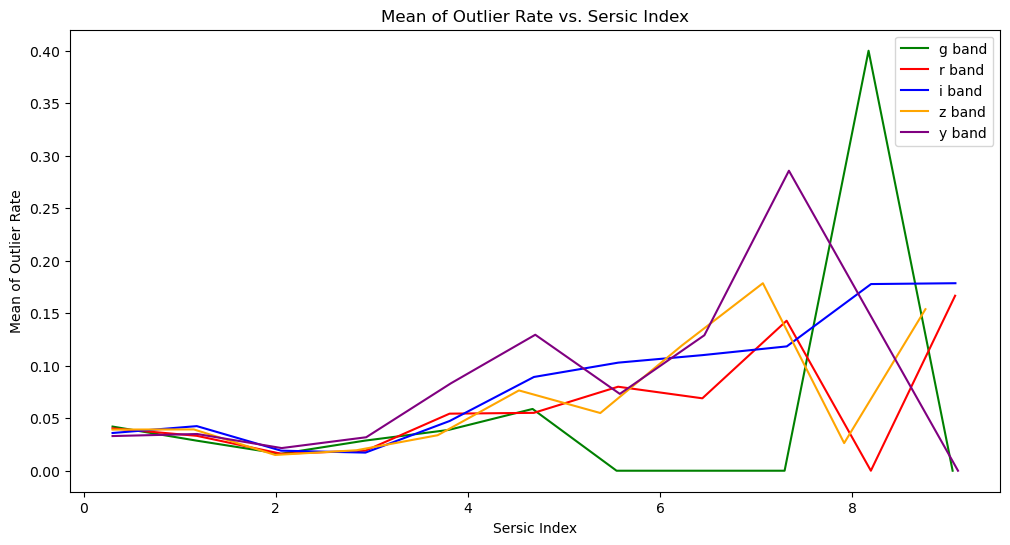

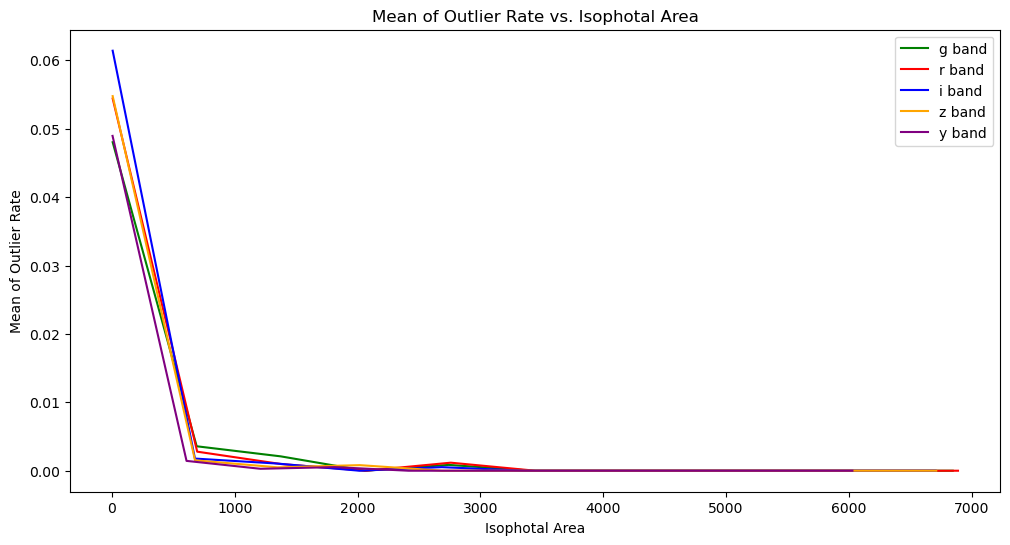

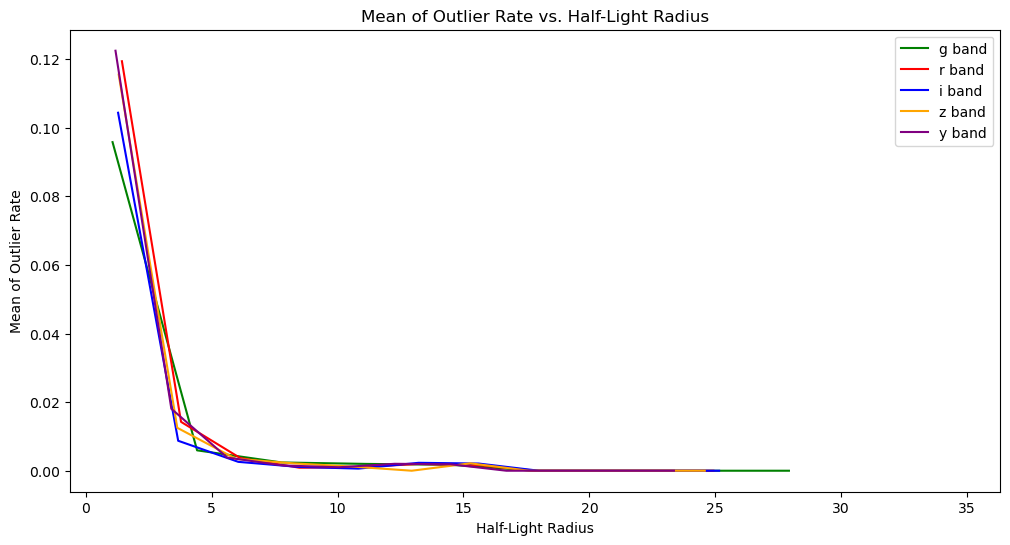

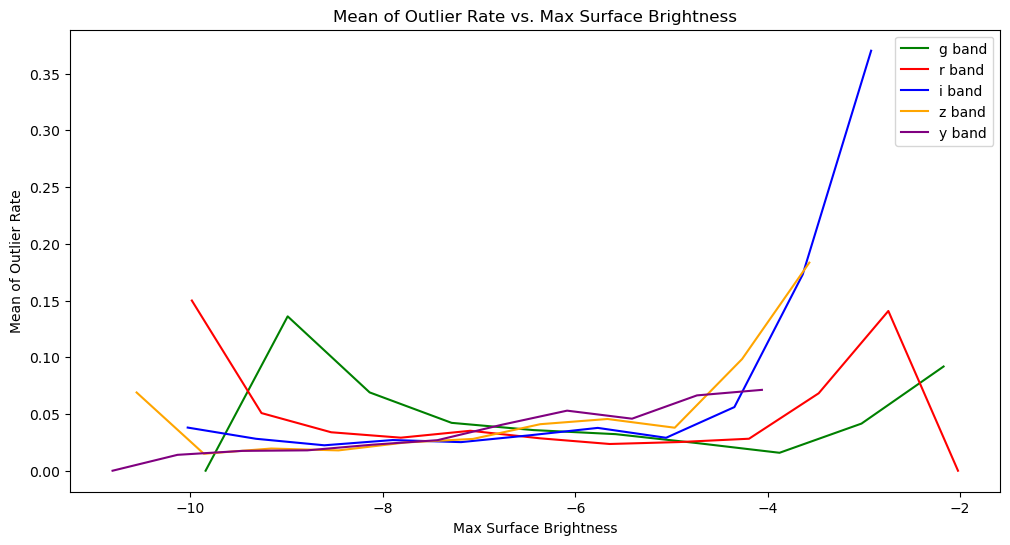

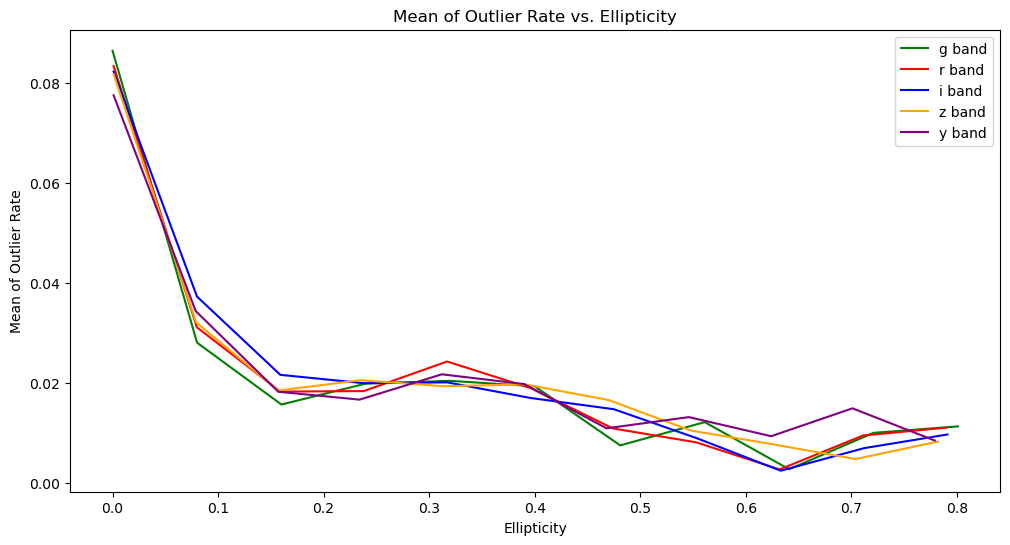

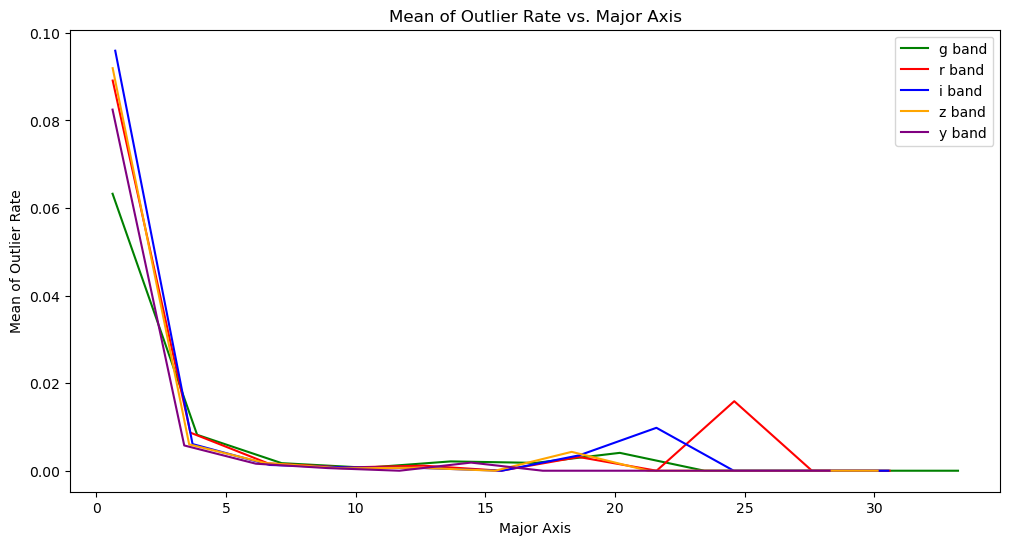

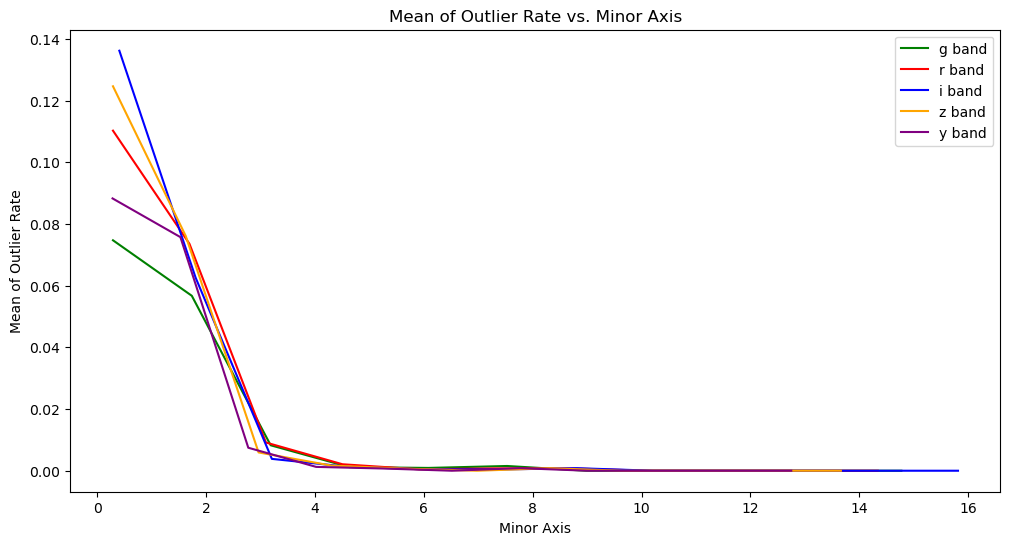

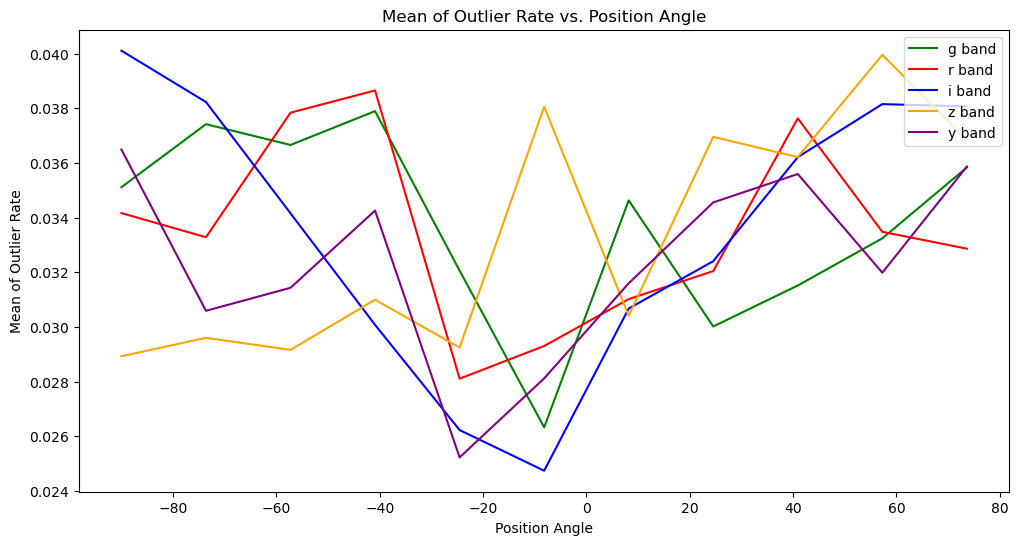

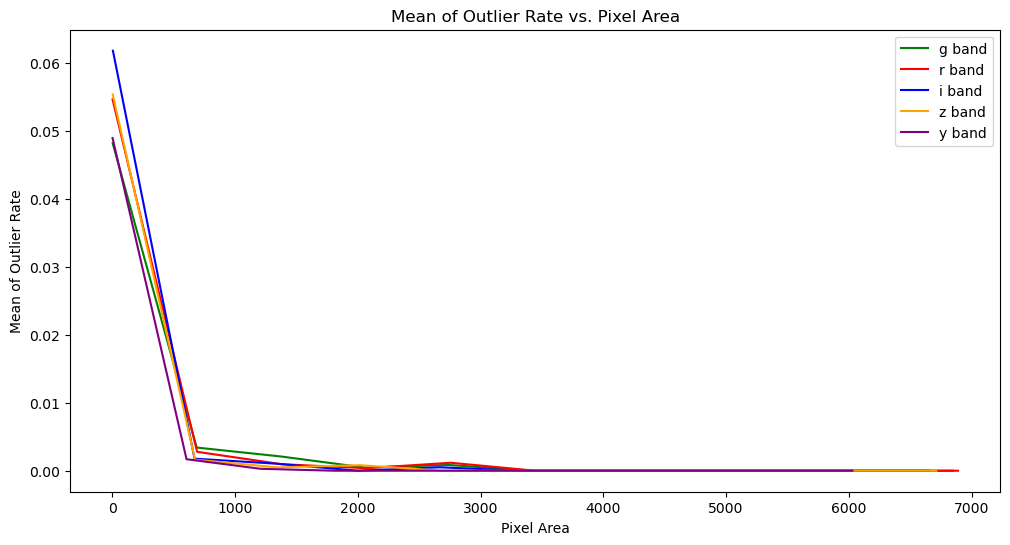

In [5]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(df_list):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], label=f'{bands[j]} band')
    axs.legend(loc='upper right')
    axs.set_title(f'Mean of Outlier Rate vs. {shape_param_names[i]}')
    axs.set_xlabel(shape_param_names[i])
    axs.set_ylabel(f'Mean of Outlier Rate')
    plt.show()

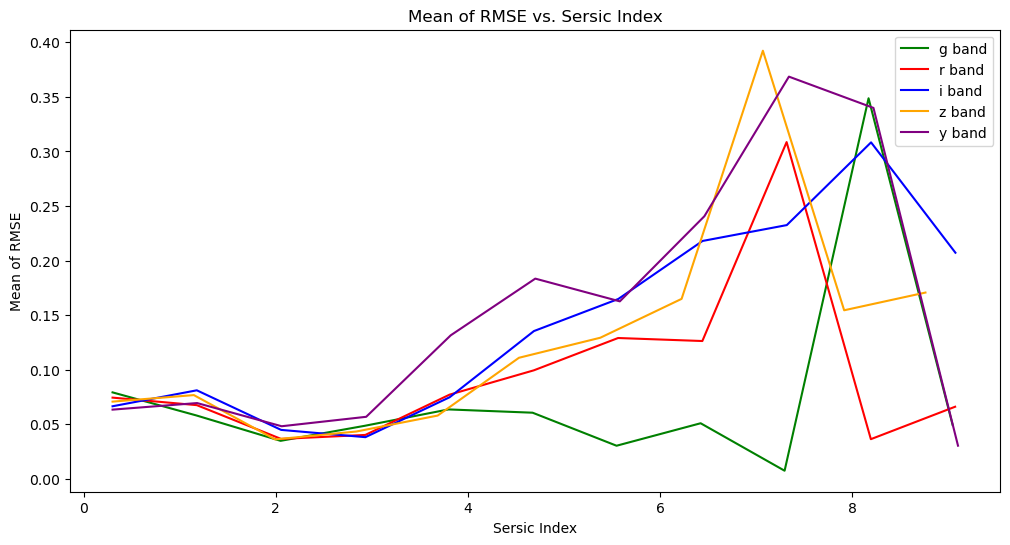

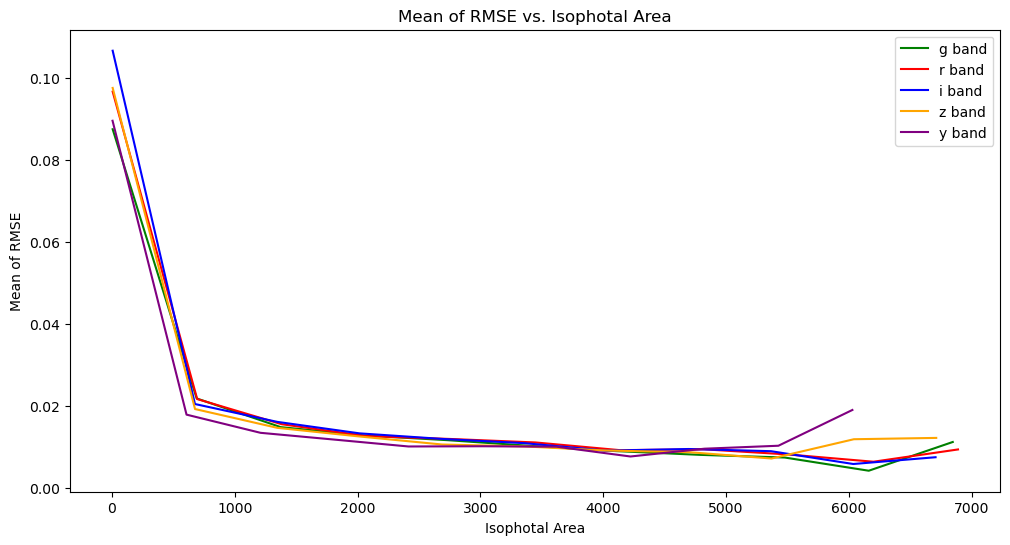

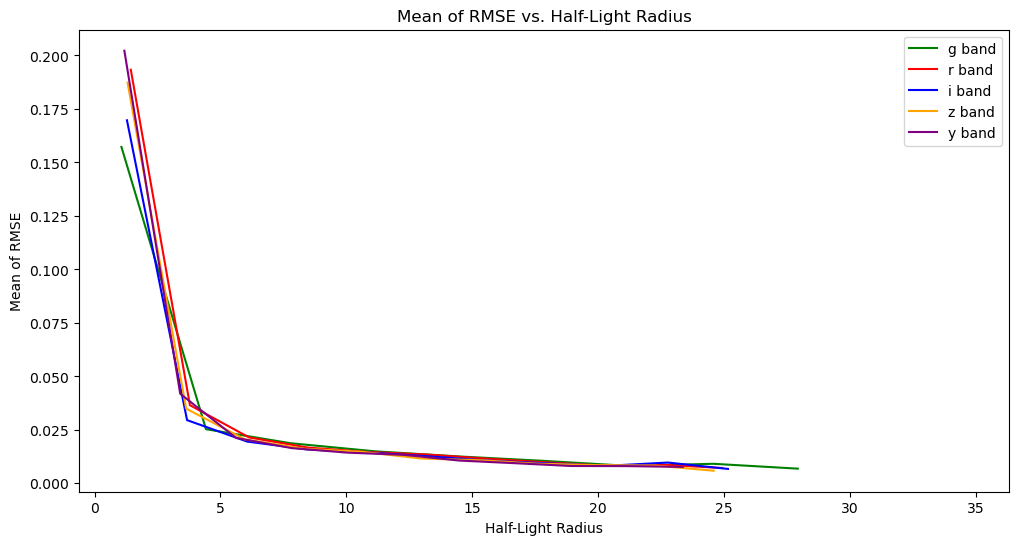

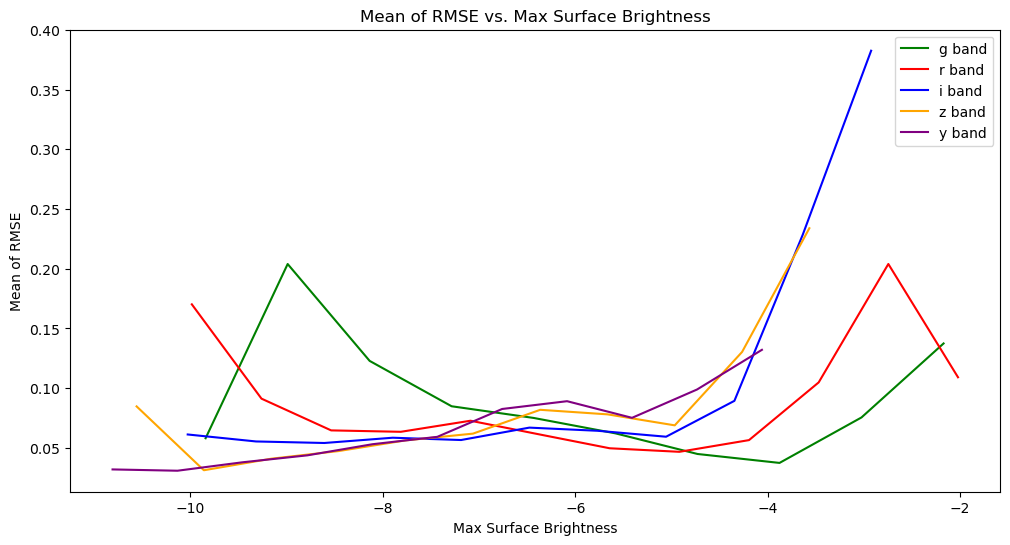

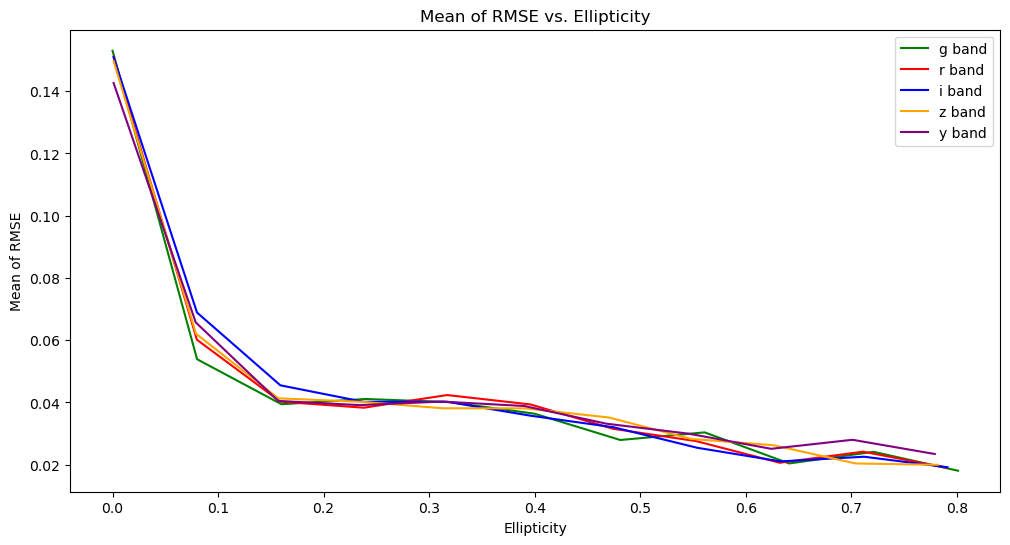

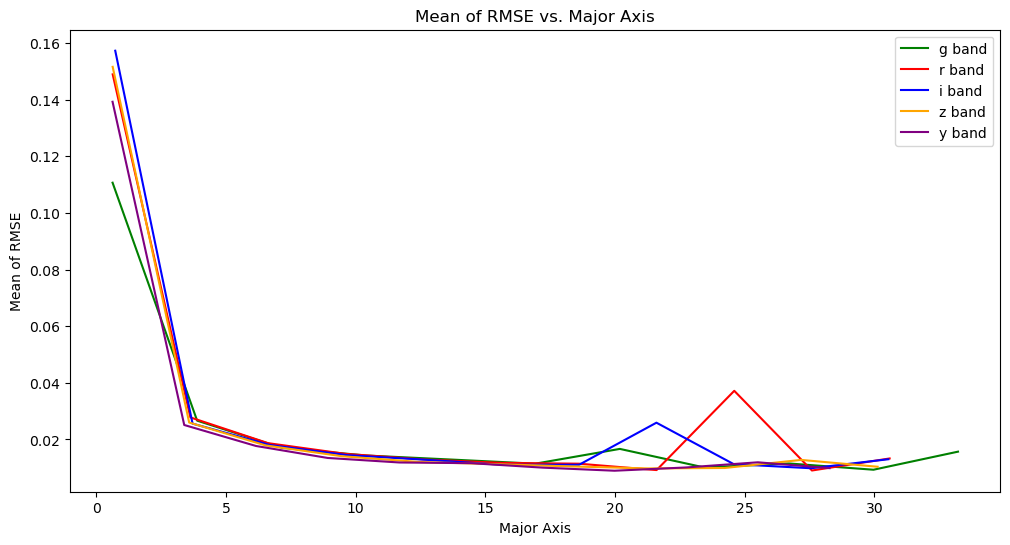

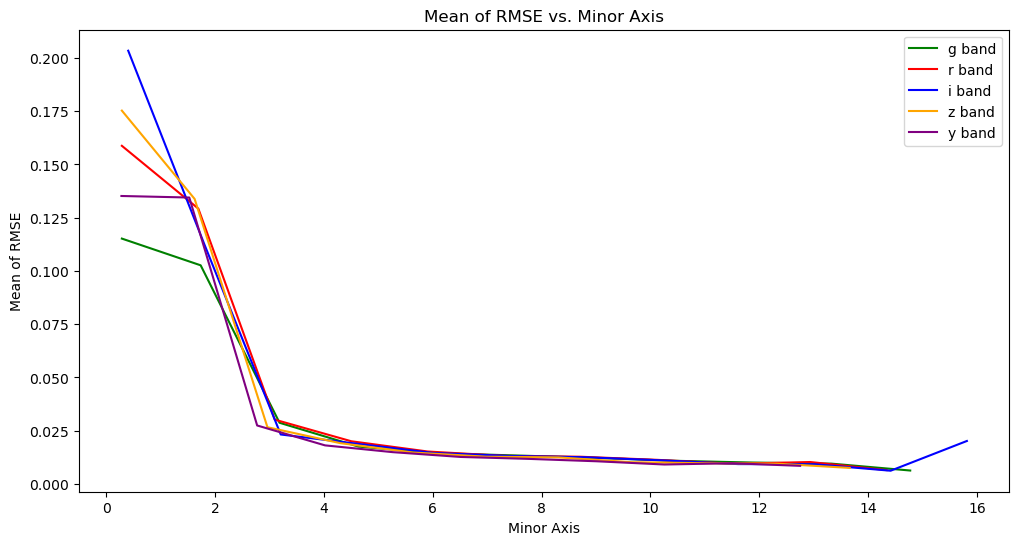

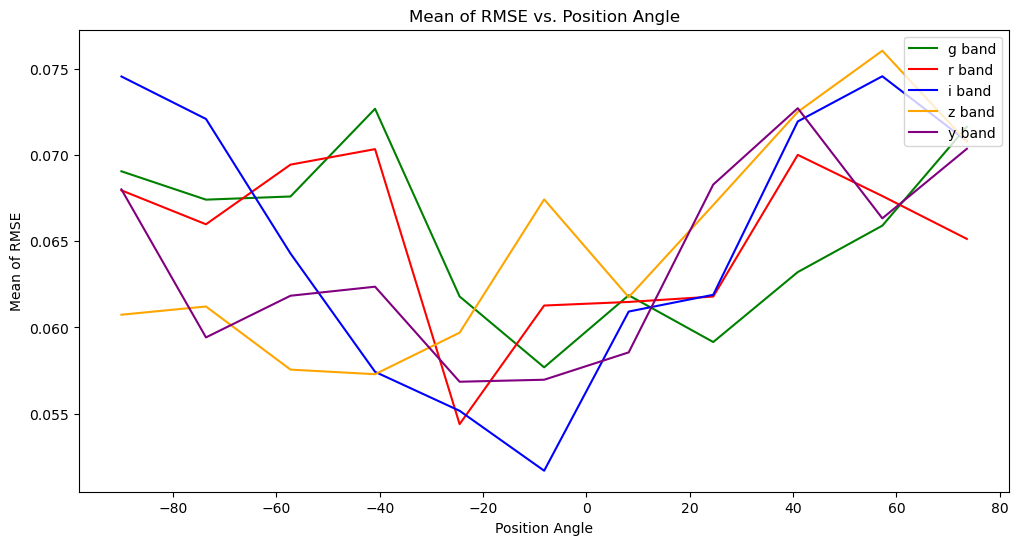

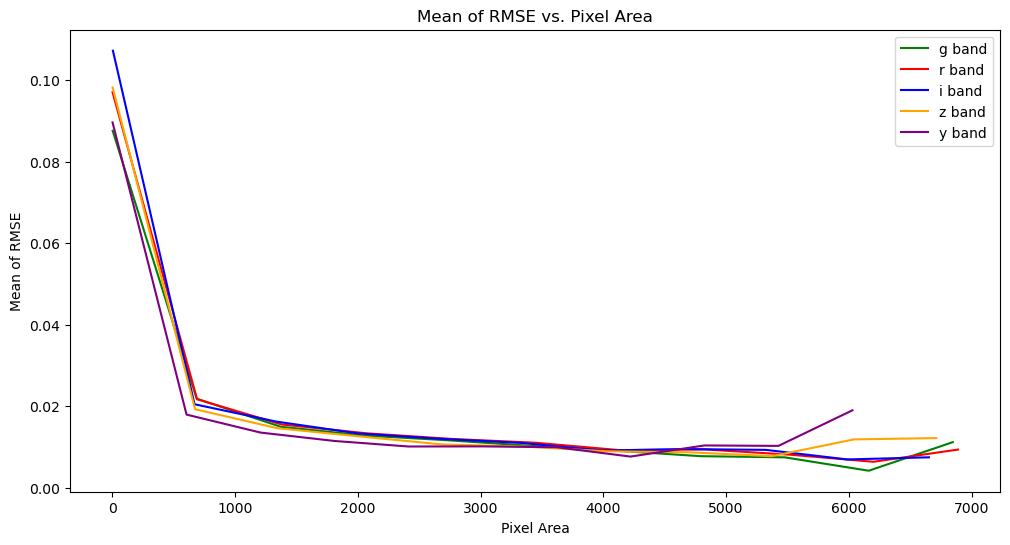

In [6]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(df_list):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['rmse'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], label=f'{bands[j]} band')
    axs.legend(loc='upper right')
    axs.set_title(f'Mean of RMSE vs. {shape_param_names[i]}')
    axs.set_xlabel(shape_param_names[i])
    axs.set_ylabel(f'Mean of RMSE')
    plt.show()

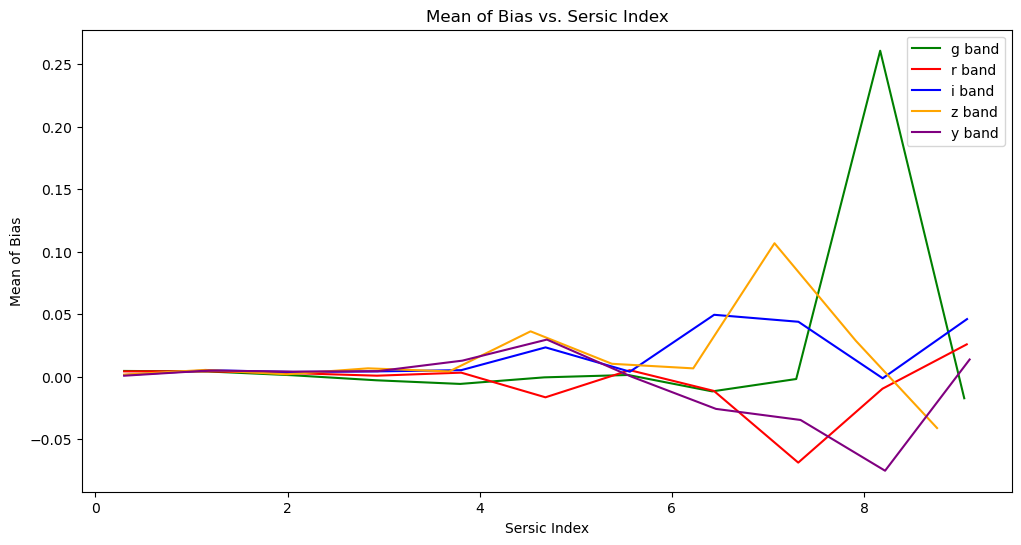

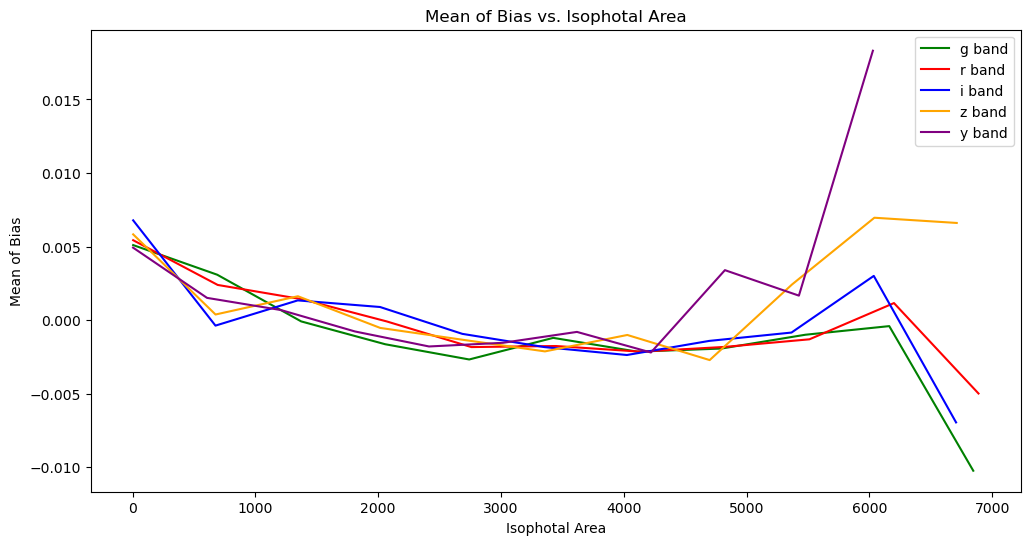

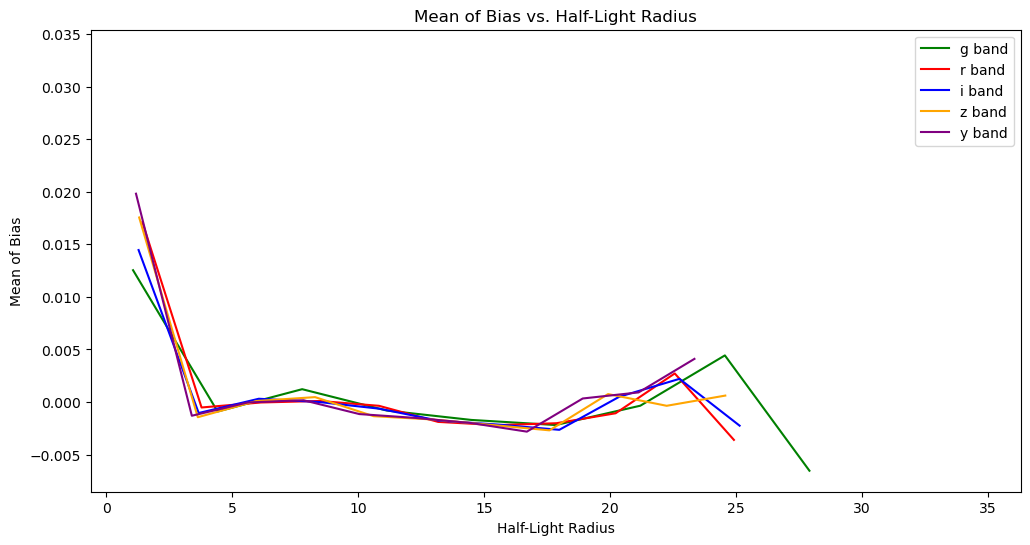

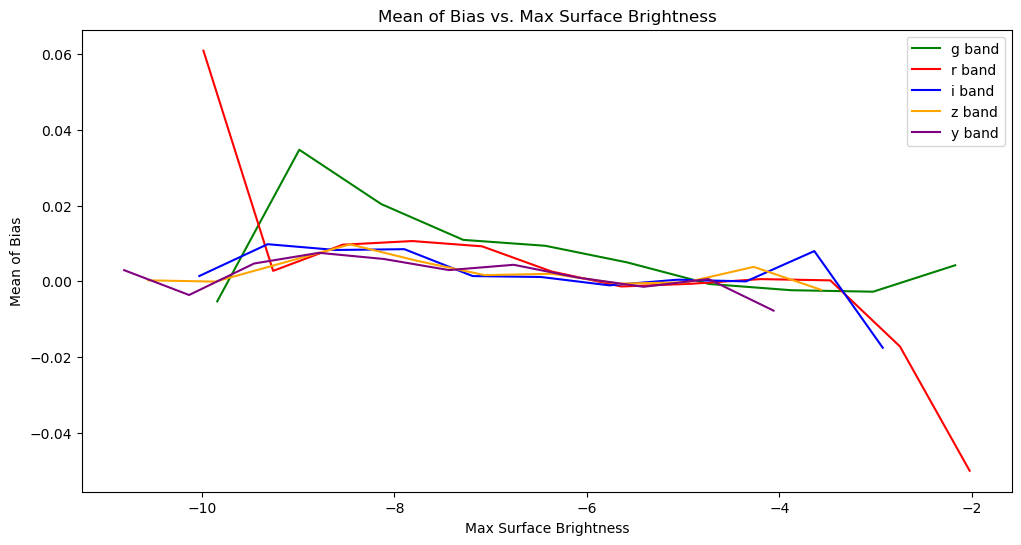

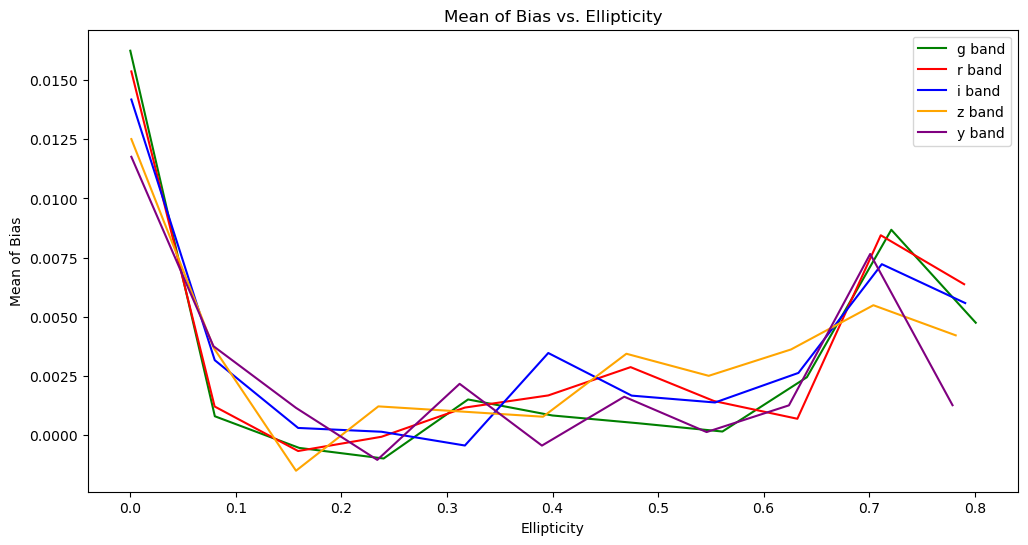

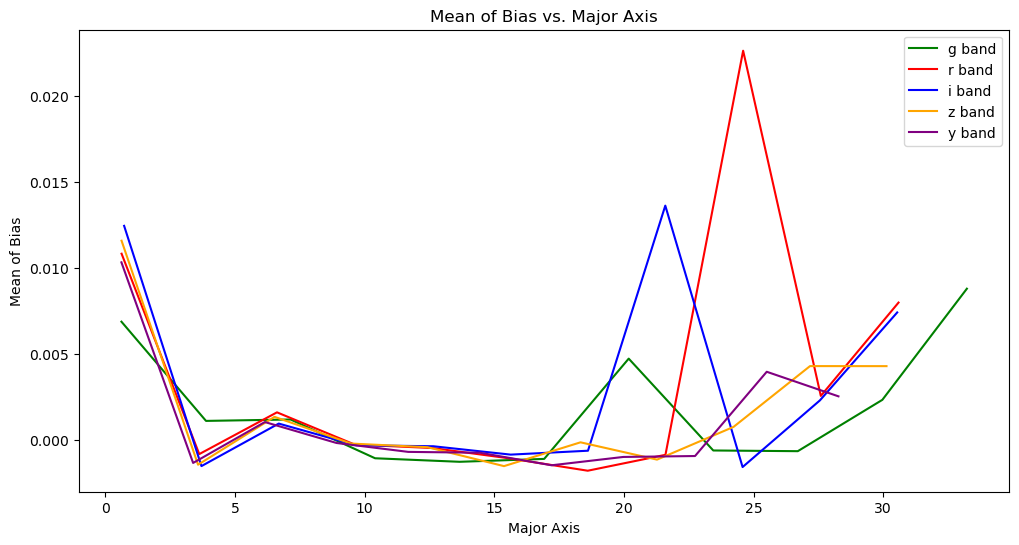

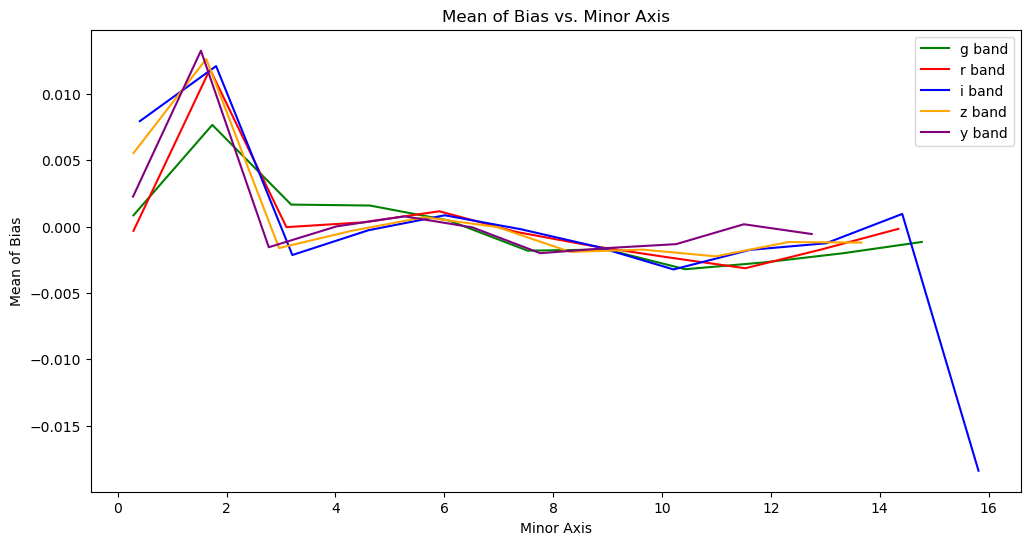

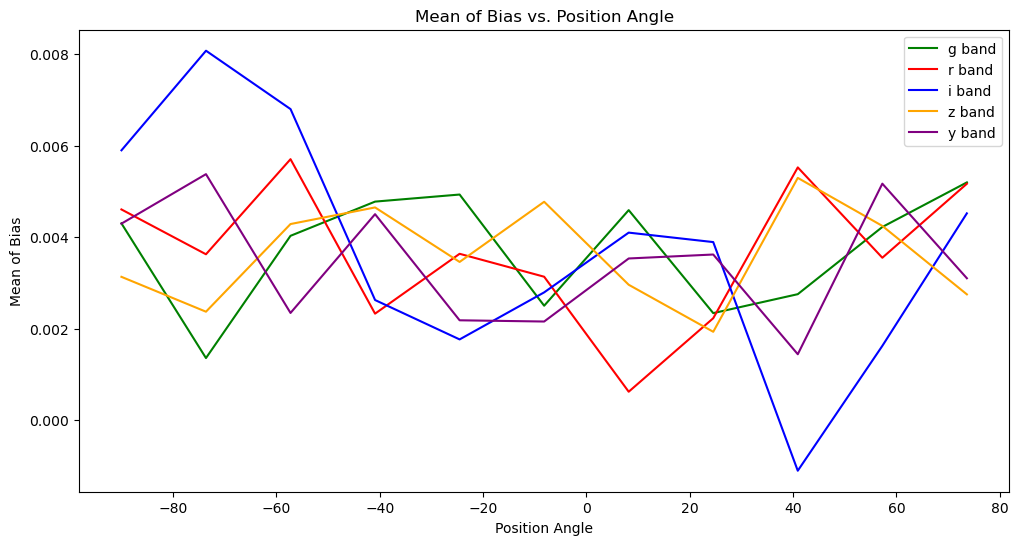

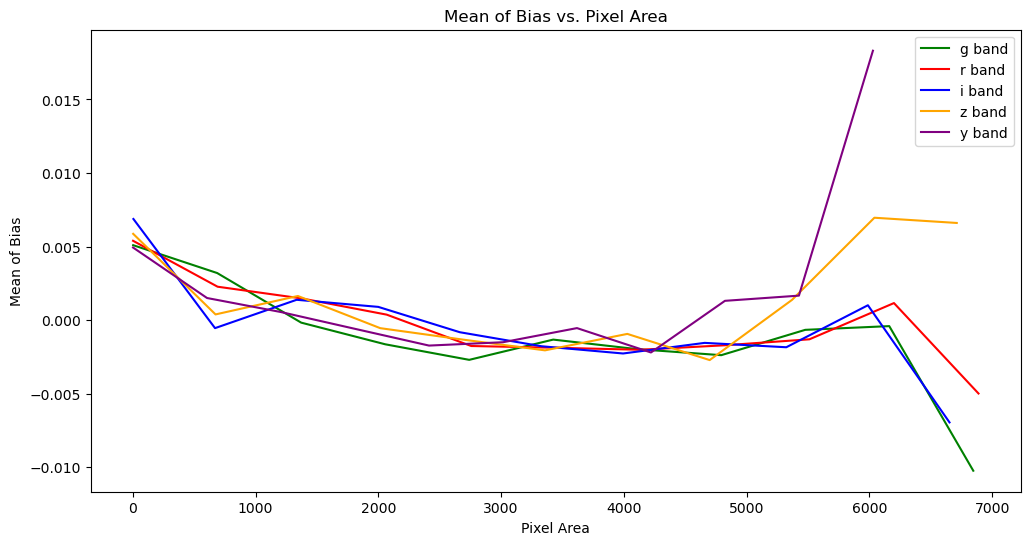

In [7]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(df_list):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['bias'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], label=f'{bands[j]} band')
    axs.legend(loc='upper right')
    axs.set_title(f'Mean of Bias vs. {shape_param_names[i]}')
    axs.set_xlabel(shape_param_names[i])
    axs.set_ylabel(f'Mean of Bias')
    plt.show()

In [8]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


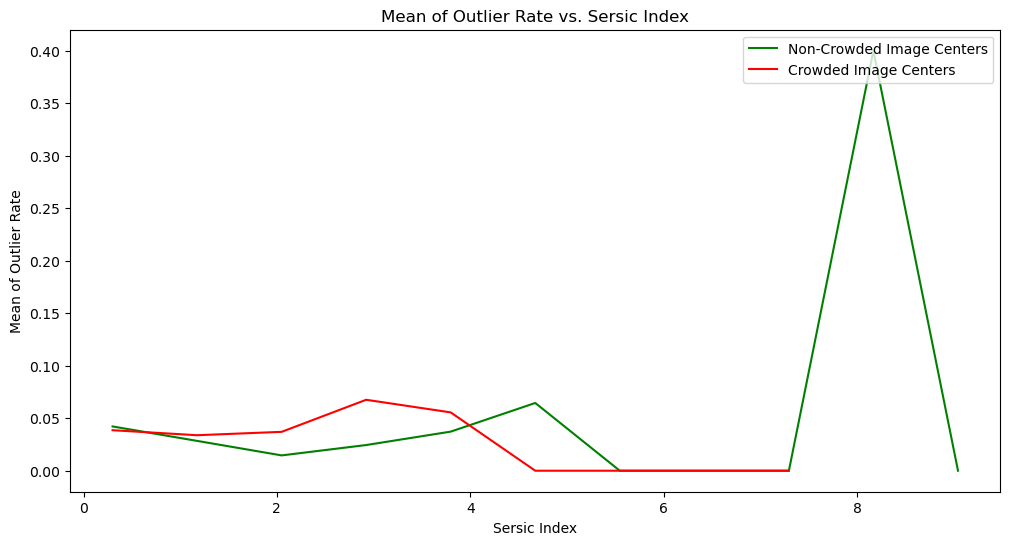

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


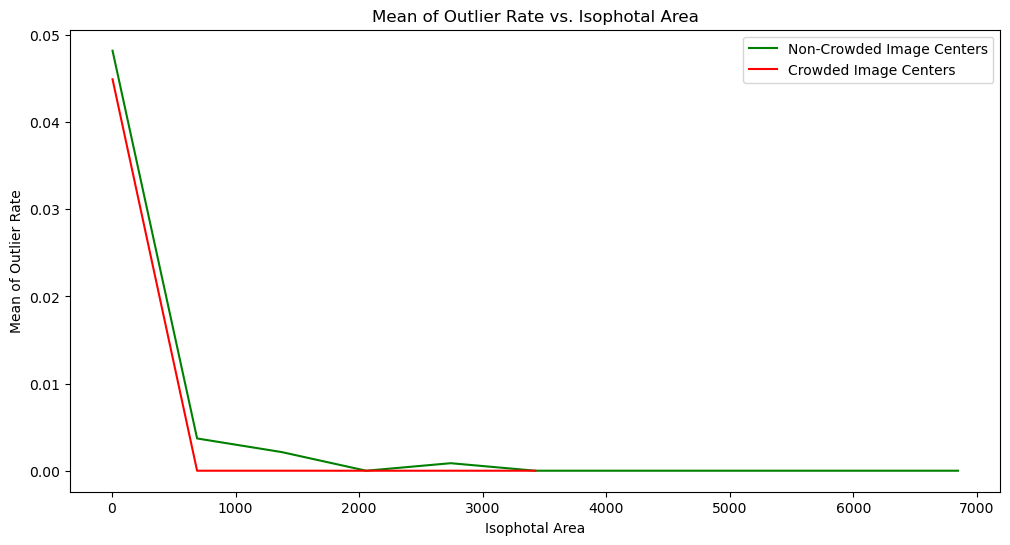

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


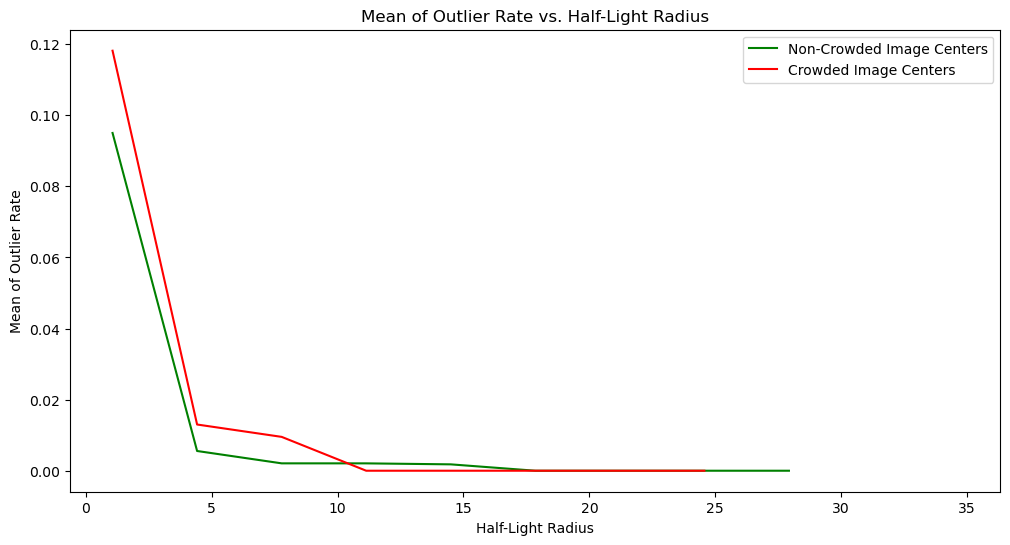

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


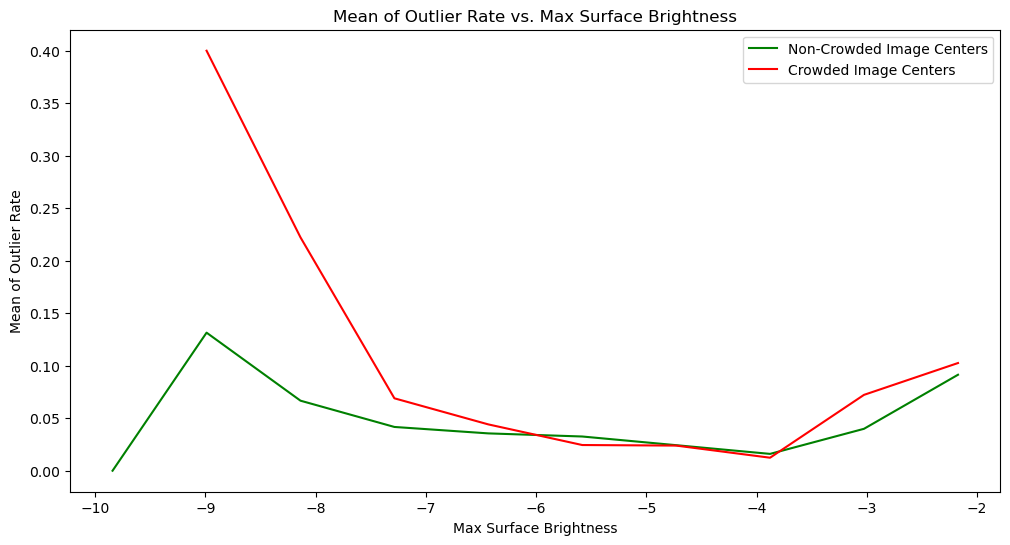

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


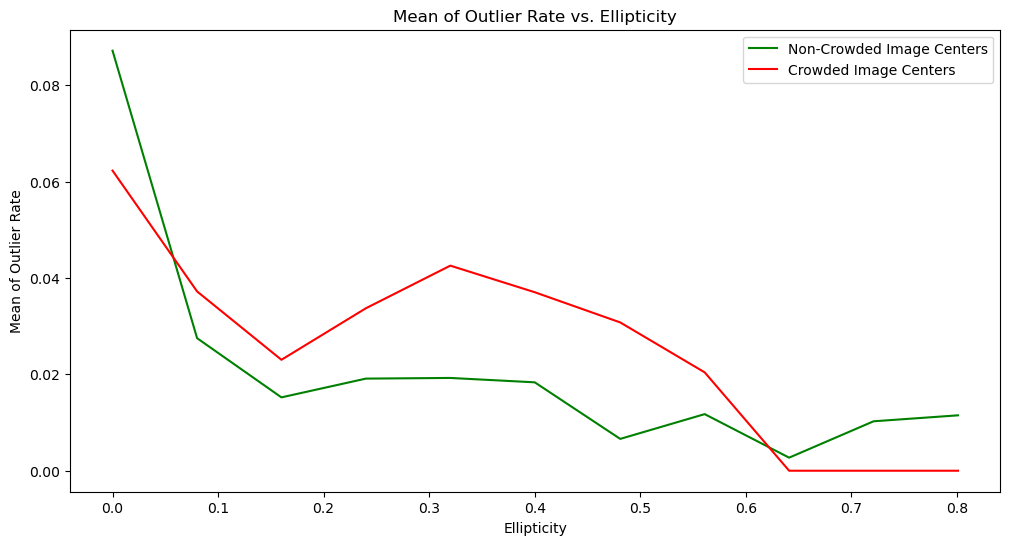

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


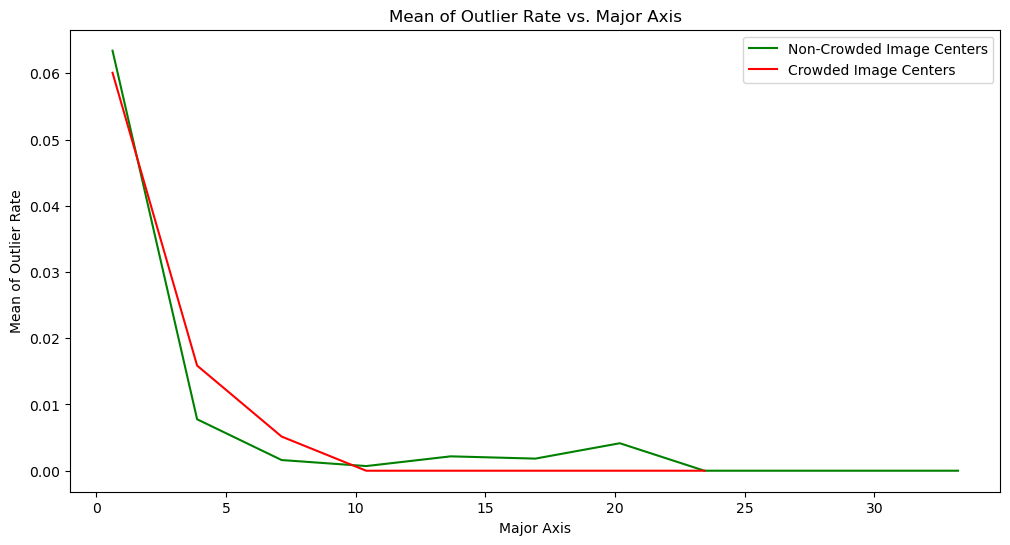

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


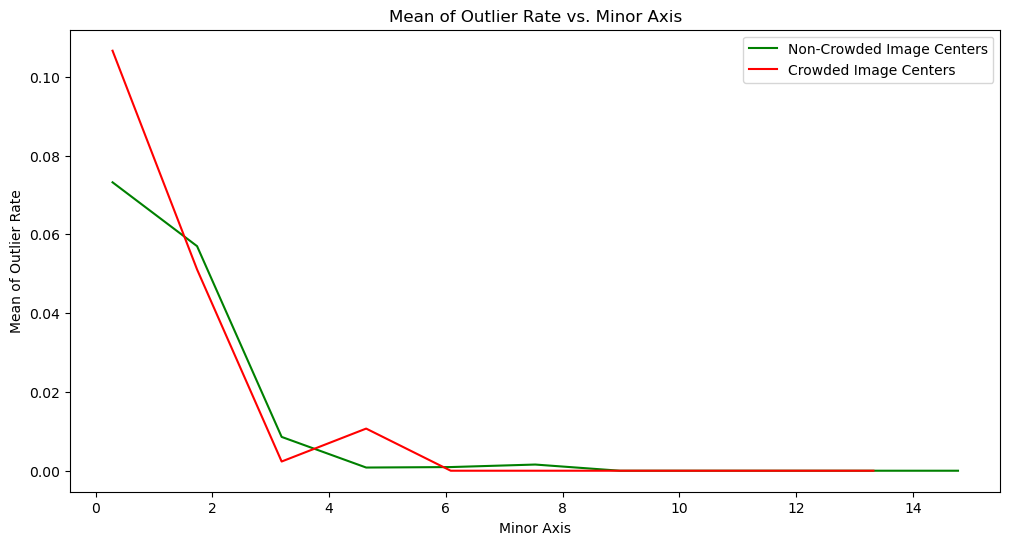

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


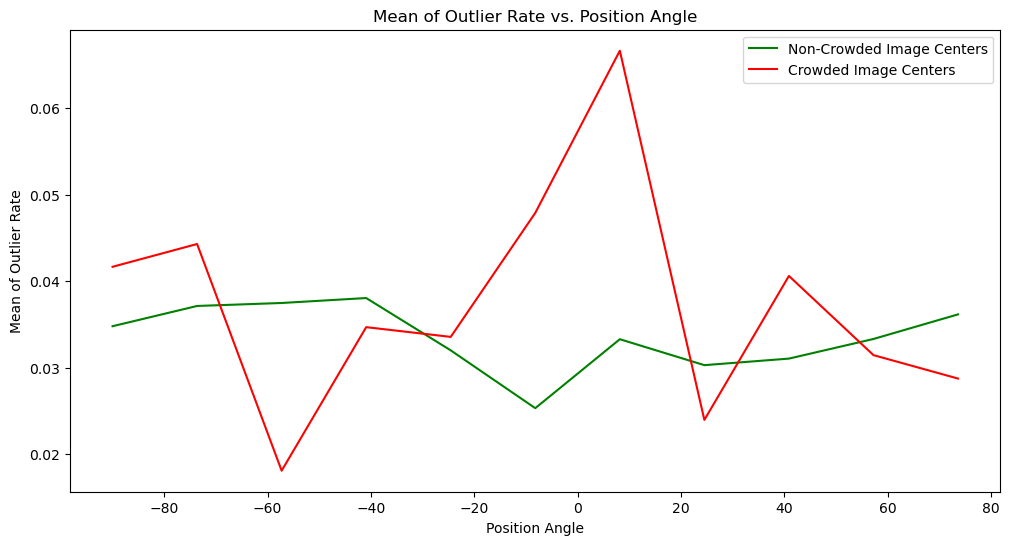

/tmp/ipykernel_1901850/3454685485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3454685485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


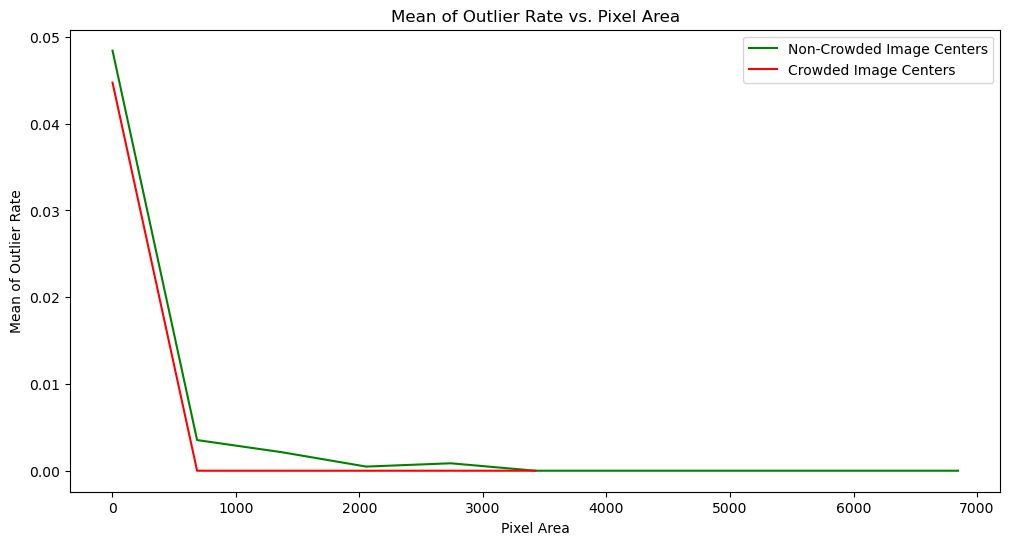

In [9]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

NBINS = 10

for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    nbins = NBINS + 1
    step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
    bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
    noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
    crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)
    noncrowded_bin_mean = noncrowded_df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
    crowded_bin_mean = crowded_df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
    axs.plot(noncrowded_bin_mean.index.to_series().apply(lambda x: x.left), noncrowded_bin_mean.values, color=colors[0], label='Non-Crowded Image Centers')
    axs.plot(crowded_bin_mean.index.to_series().apply(lambda x: x.left), crowded_bin_mean.values, color=colors[1], label='Crowded Image Centers')
    axs.legend(loc='upper right')
    axs.set_title(f'Mean of Outlier Rate vs. {shape_param_names[i]}')
    axs.set_xlabel(shape_param_names[i])
    axs.set_ylabel(f'Mean of Outlier Rate')
    plt.show()

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


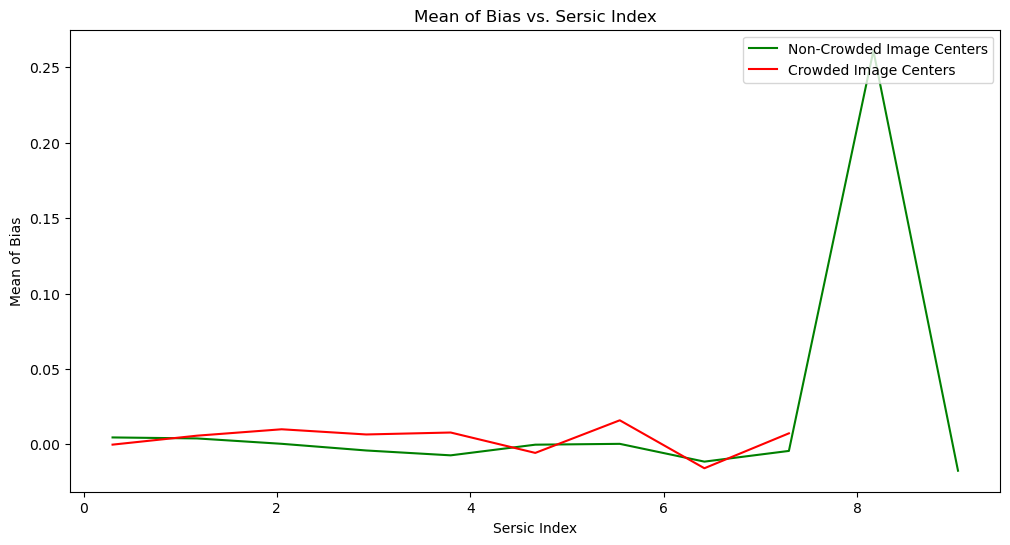

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


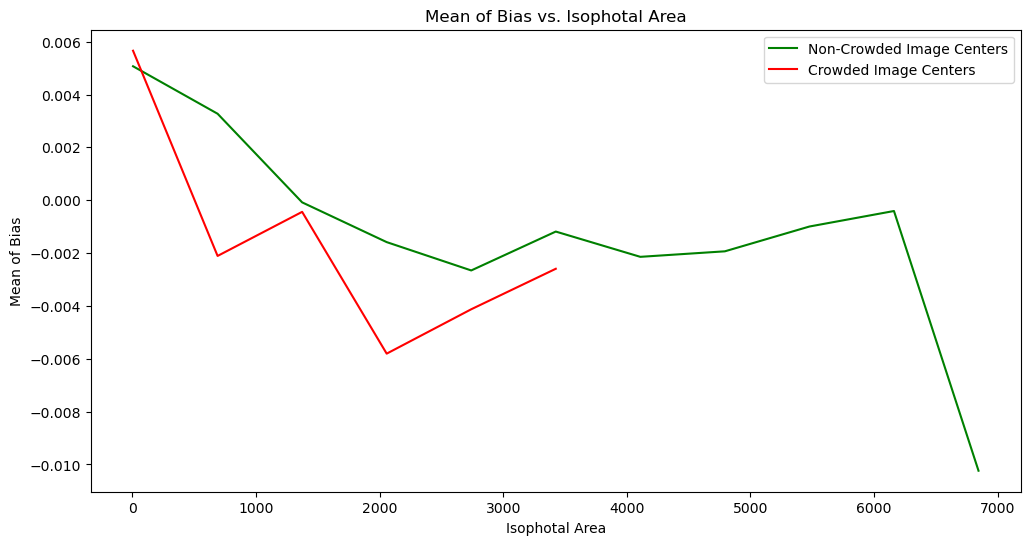

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


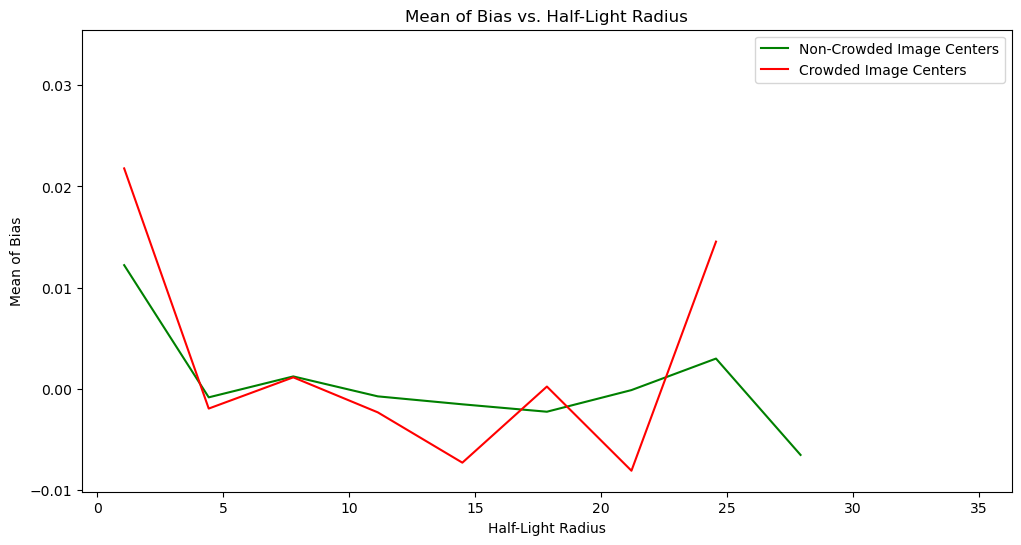

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


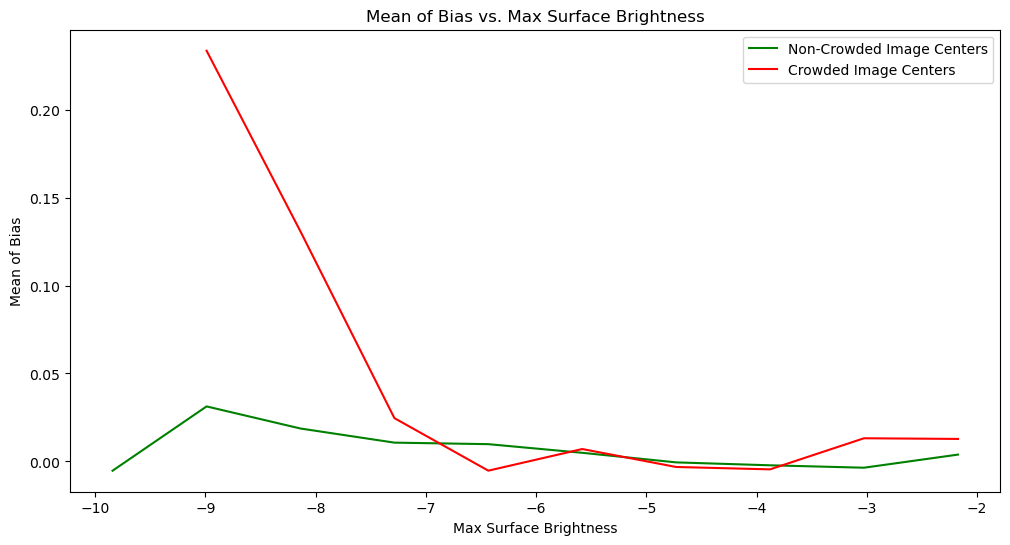

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


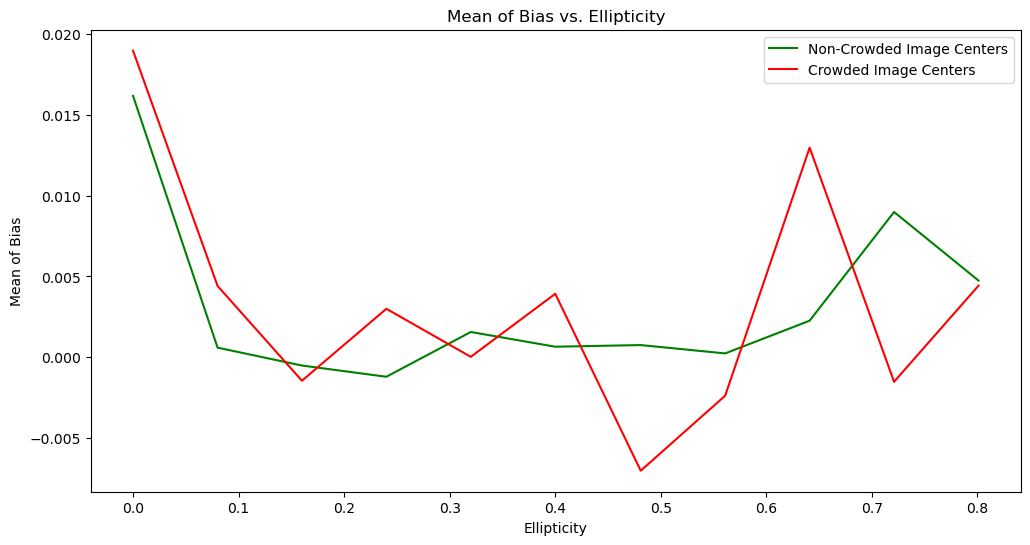

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


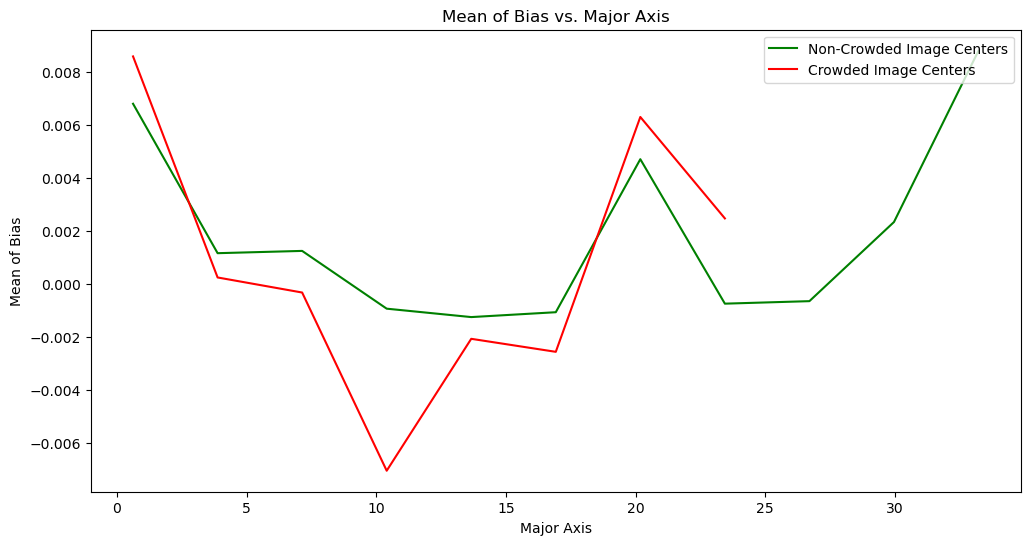

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


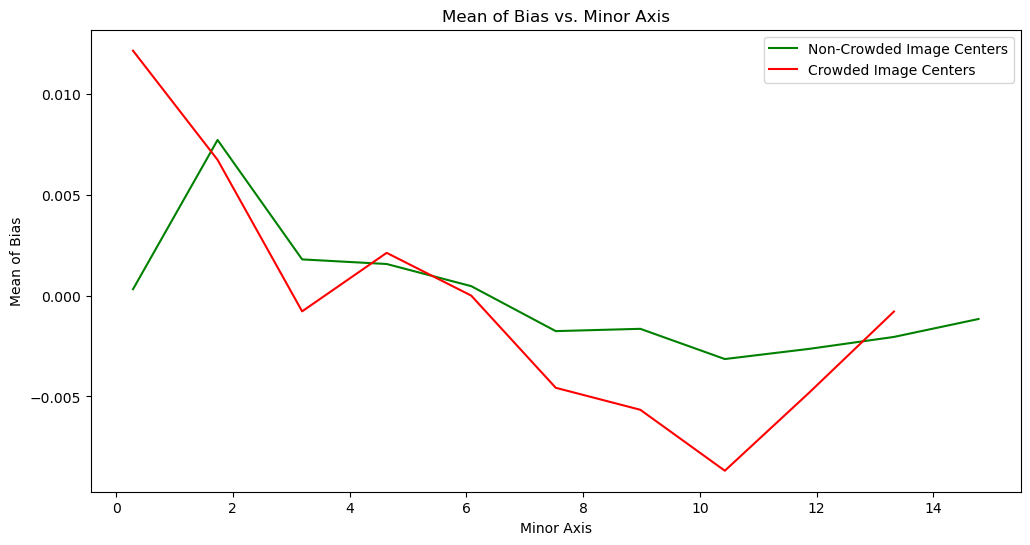

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


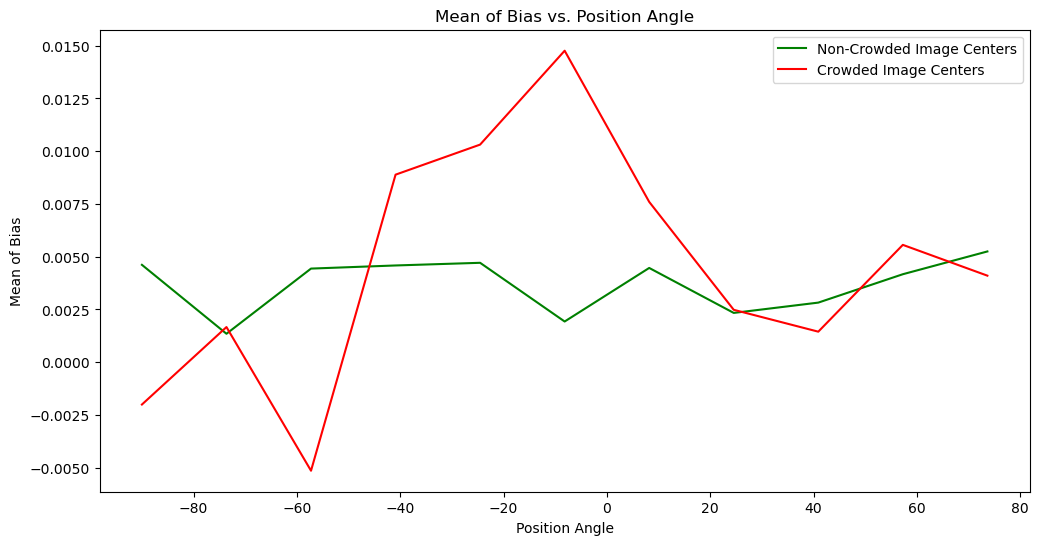

/tmp/ipykernel_1901850/3838538936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/3838538936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


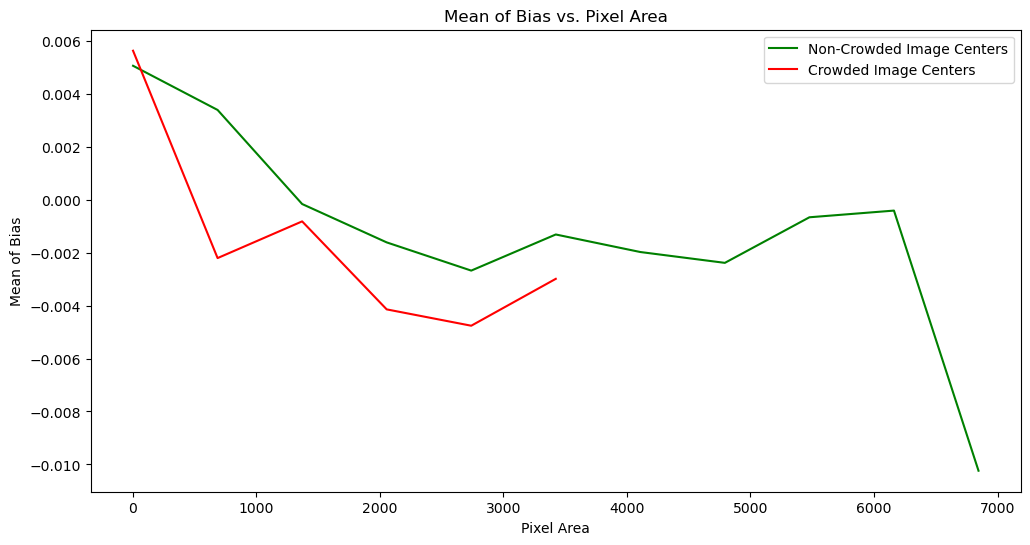

In [10]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

NBINS = 10

for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    nbins = NBINS + 1
    step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
    bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
    noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
    crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)
    noncrowded_bin_mean = noncrowded_df.groupby(f'{shape_param}_bins')['bias'].mean()
    crowded_bin_mean = crowded_df.groupby(f'{shape_param}_bins')['bias'].mean()
    axs.plot(noncrowded_bin_mean.index.to_series().apply(lambda x: x.left), noncrowded_bin_mean.values, color=colors[0], label='Non-Crowded Image Centers')
    axs.plot(crowded_bin_mean.index.to_series().apply(lambda x: x.left), crowded_bin_mean.values, color=colors[1], label='Crowded Image Centers')
    axs.legend(loc='upper right')
    axs.set_title(f'Mean of Bias vs. {shape_param_names[i]}')
    axs.set_xlabel(shape_param_names[i])
    axs.set_ylabel(f'Mean of Bias')
    plt.show()

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


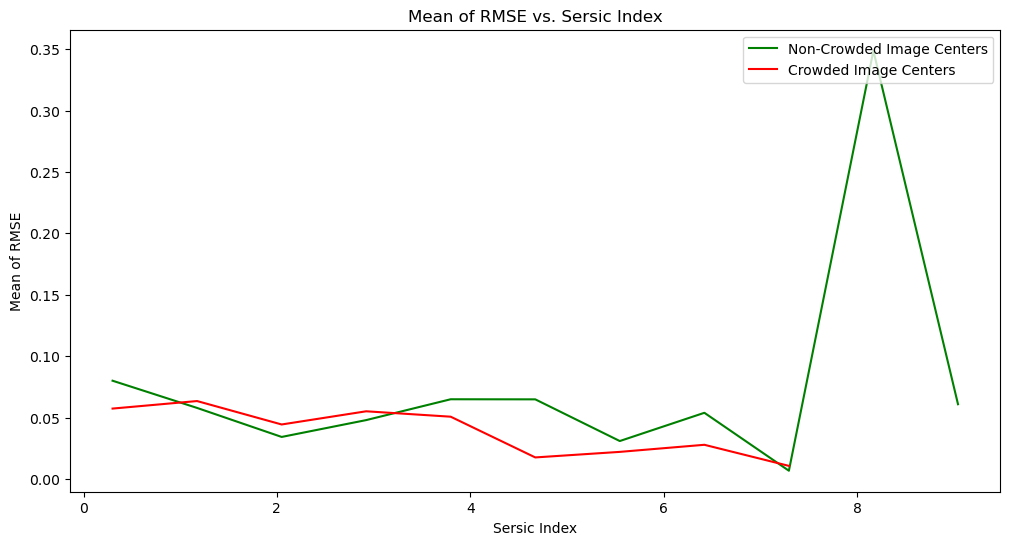

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


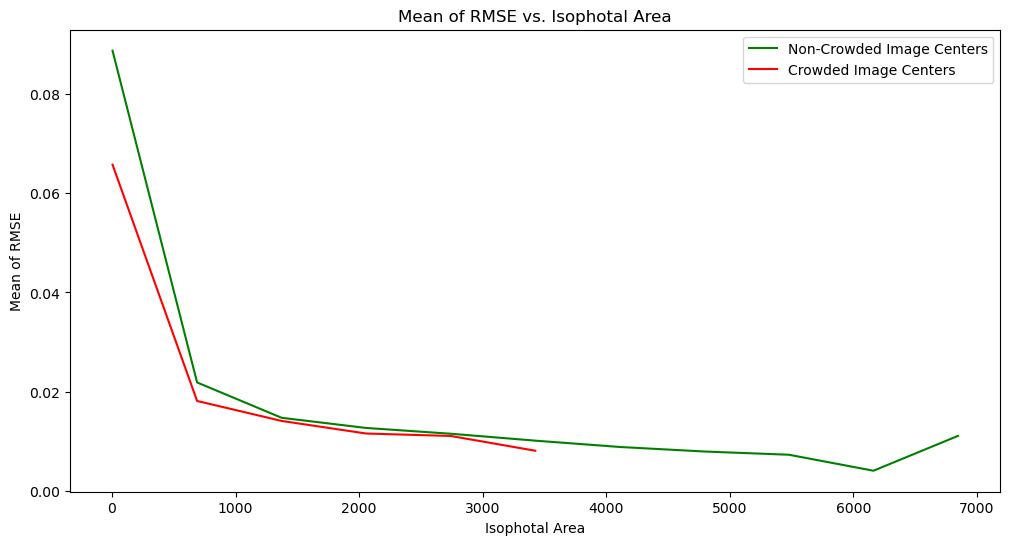

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


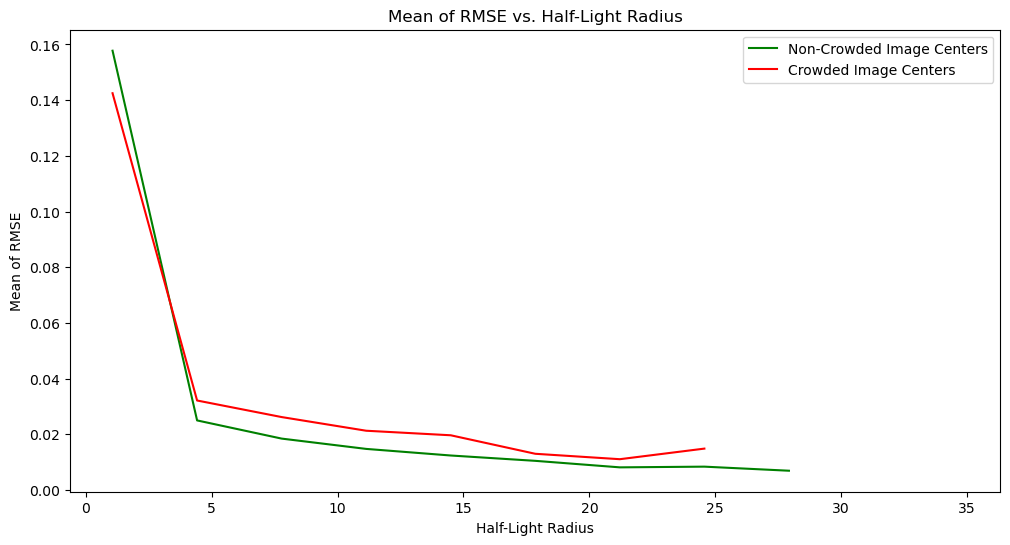

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


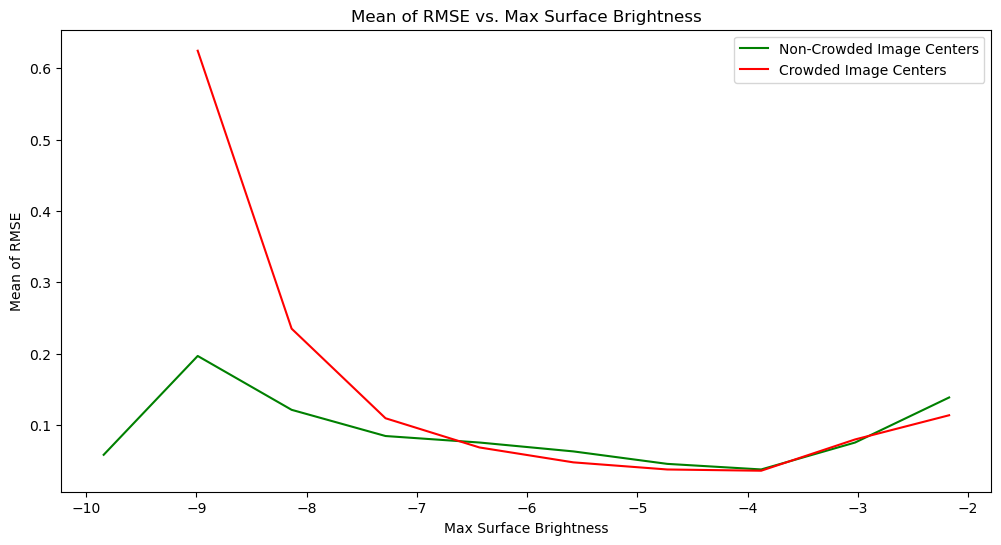

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


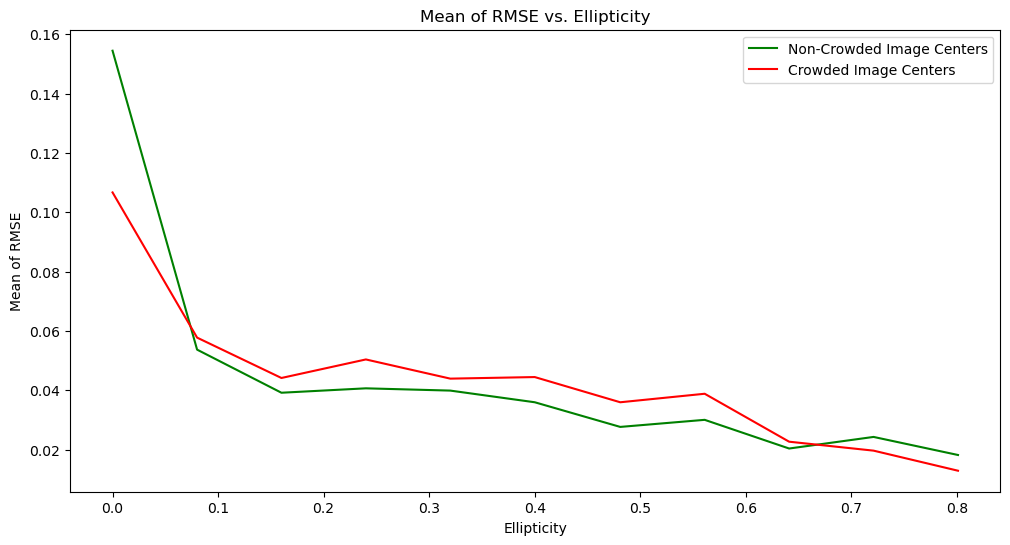

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


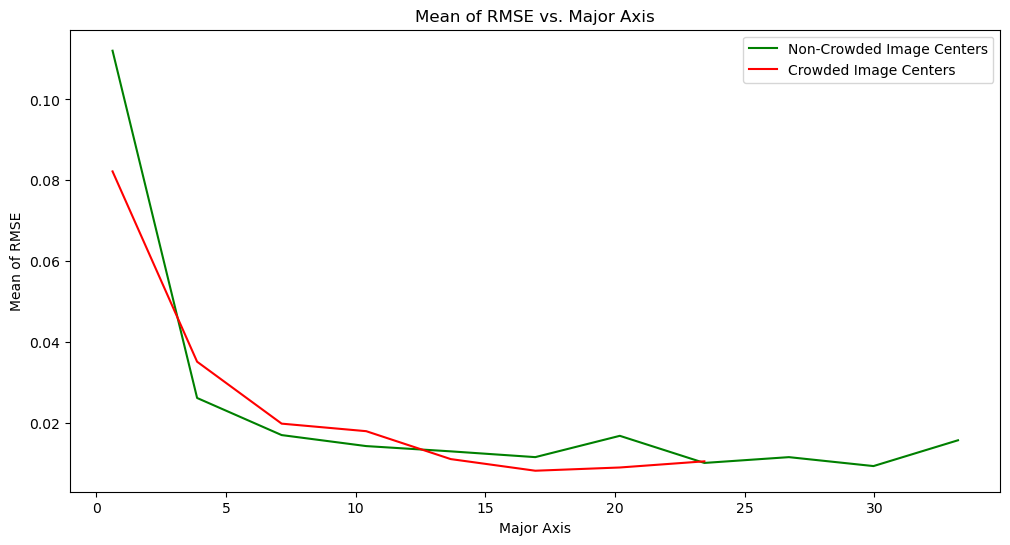

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


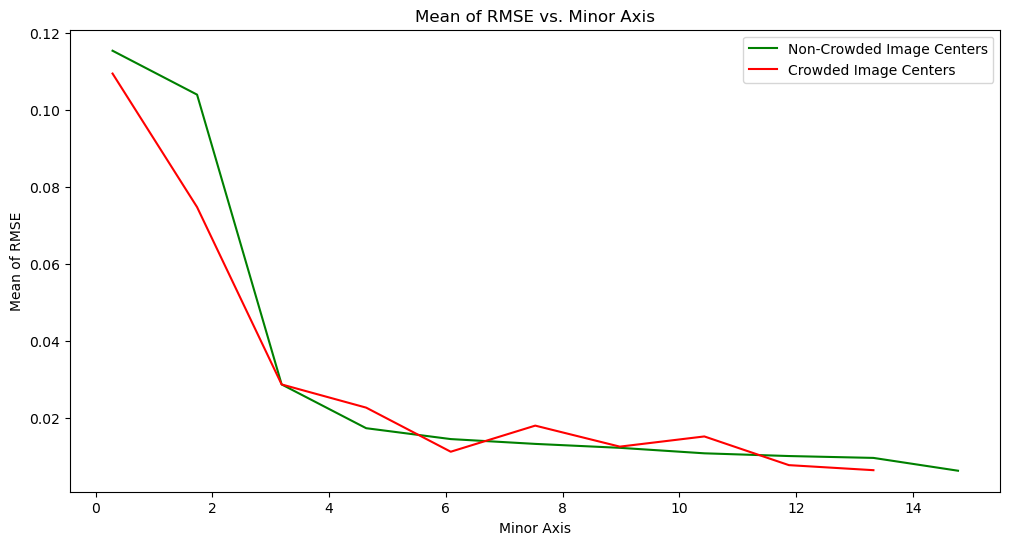

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


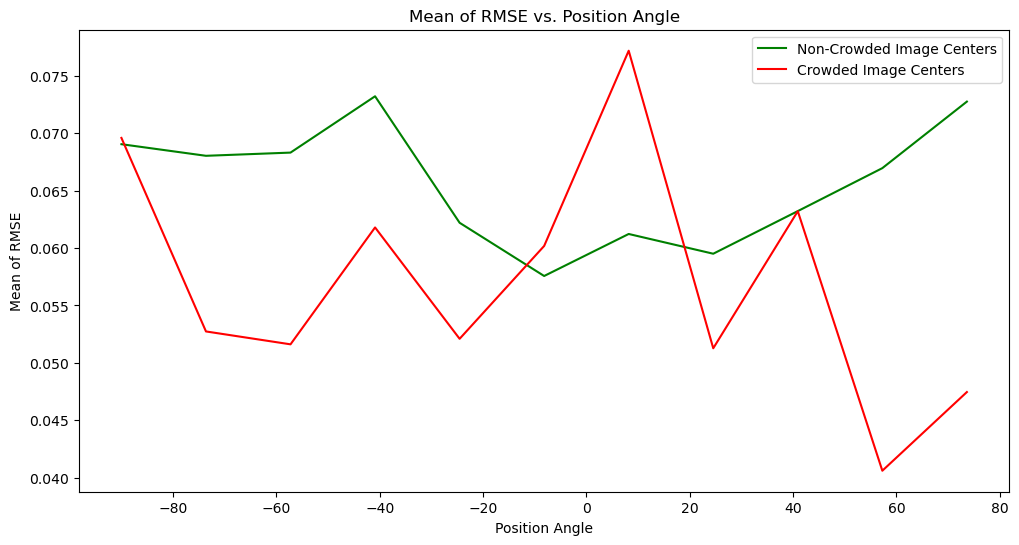

/tmp/ipykernel_1901850/74221638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
/tmp/ipykernel_1901850/74221638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)


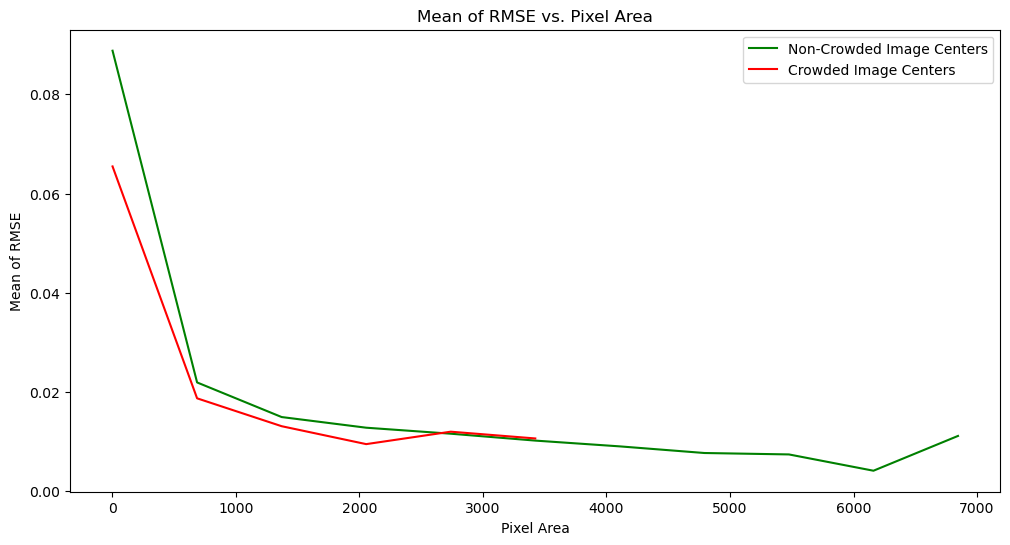

In [11]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

NBINS = 10

for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    nbins = NBINS + 1
    step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
    bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
    noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
    crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)
    noncrowded_bin_mean = noncrowded_df.groupby(f'{shape_param}_bins')['rmse'].mean()
    crowded_bin_mean = crowded_df.groupby(f'{shape_param}_bins')['rmse'].mean()
    axs.plot(noncrowded_bin_mean.index.to_series().apply(lambda x: x.left), noncrowded_bin_mean.values, color=colors[0], label='Non-Crowded Image Centers')
    axs.plot(crowded_bin_mean.index.to_series().apply(lambda x: x.left), crowded_bin_mean.values, color=colors[1], label='Crowded Image Centers')
    axs.legend(loc='upper right')
    axs.set_title(f'Mean of RMSE vs. {shape_param_names[i]}')
    axs.set_xlabel(shape_param_names[i])
    axs.set_ylabel(f'Mean of RMSE')
    plt.show()